<a href="https://colab.research.google.com/github/hussaintaniya/stockpred2/blob/main/lr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#using "Linear regression" to predict Microsoft stocks from 1986-03-12 to 2022-06-24

In [ ]:
#import libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import math

In [ ]:
#import data and display it

In [ ]:
data=pd.read_csv("MSFT.csv")
print(data)

            Date        Open        High         Low       Close   Adj Close  \
0     1986-03-13    0.088542    0.101563    0.088542    0.097222    0.061109   
1     1986-03-14    0.097222    0.102431    0.097222    0.100694    0.063292   
2     1986-03-17    0.100694    0.103299    0.100694    0.102431    0.064384   
3     1986-03-18    0.102431    0.103299    0.098958    0.099826    0.062746   
4     1986-03-19    0.099826    0.100694    0.097222    0.098090    0.061655   
...          ...         ...         ...         ...         ...         ...   
9141  2022-06-17  244.699997  250.500000  244.029999  247.649994  247.649994   
9142  2022-06-21  250.259995  254.750000  249.509995  253.740005  253.740005   
9143  2022-06-22  251.889999  257.170013  250.369995  253.130005  253.130005   
9144  2022-06-23  255.570007  259.369995  253.630005  258.859985  258.859985   
9145  2022-06-24  261.809998  267.980011  261.720001  267.700012  267.700012   

          Volume  
0     1031788800  
1

In [ ]:
#index the data to date instead of the serial no.

In [ ]:
data.set_index(pd.DatetimeIndex(data['Date']),inplace=True)

In [ ]:
#trim the data. we will only keep the adj close column as it is used to analysie
#historical returns

In [ ]:
data=data[['Adj Close']]
print(data)

             Adj Close
Date                  
1986-03-13    0.061109
1986-03-14    0.063292
1986-03-17    0.064384
1986-03-18    0.062746
1986-03-19    0.061655
...                ...
2022-06-17  247.649994
2022-06-21  253.740005
2022-06-22  253.130005
2022-06-23  258.859985
2022-06-24  267.700012

[9146 rows x 1 columns]


In [ ]:
#plot adj close data against time

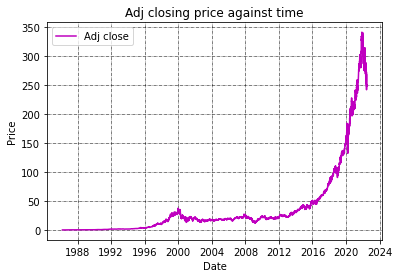

In [ ]:
plt.plot(data,color='m')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Adj closing price against time')
plt.legend(['Adj close'])
plt.grid(which='major',color='k',linestyle='-.',linewidth='0.5')
plt.show()

In [ ]:
#add moving average

In [ ]:
! pip install pandas-ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 5.1 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=a037d120919773445950512c45b7a3ce9f7d542bca978e3e921988d24e88dd4f
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [ ]:
import pandas_ta
data.ta.ema(close='Adj Close',length=10,append=True)

Date
1986-03-13           NaN
1986-03-14           NaN
1986-03-17           NaN
1986-03-18           NaN
1986-03-19           NaN
                 ...    
2022-06-17    253.630215
2022-06-21    253.650177
2022-06-22    253.555600
2022-06-23    254.520034
2022-06-24    256.916394
Name: EMA_10, Length: 9146, dtype: float64

In [ ]:
print(data.head(10))

            Adj Close    EMA_10
Date                           
1986-03-13   0.061109       NaN
1986-03-14   0.063292       NaN
1986-03-17   0.064384       NaN
1986-03-18   0.062746       NaN
1986-03-19   0.061655       NaN
1986-03-20   0.060018       NaN
1986-03-21   0.058381       NaN
1986-03-24   0.056745       NaN
1986-03-25   0.057836       NaN
1986-03-26   0.059473  0.060564


In [ ]:
#as our first 9 values are nan, we will remove them as we dont want nan values

In [ ]:
data=data.iloc[9:]
print(data.head(10))

            Adj Close    EMA_10
Date                           
1986-03-26   0.059473  0.060564
1986-03-27   0.060564  0.060564
1986-03-31   0.060018  0.060465
1986-04-01   0.059473  0.060284
1986-04-02   0.060018  0.060236
1986-04-03   0.060564  0.060296
1986-04-04   0.060564  0.060344
1986-04-07   0.059473  0.060186
1986-04-08   0.060018  0.060155
1986-04-09   0.061109  0.060329


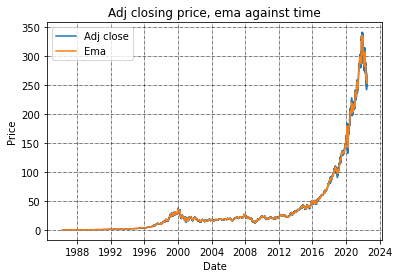

In [ ]:
plt.plot(data)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Adj closing price, ema against time")
plt.legend(['Adj close','Ema'])
plt.grid(which='major',color='k',linestyle='-.',linewidth=0.5)
plt.show()

In [ ]:
#splitting our data into test and train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[['Adj Close']], data[['EMA_10']], test_size=.2)

In [ ]:
#training our linear regression model

In [ ]:
model= LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('tested data')
print(X_test)
print('Predicted data')
print(y_pred)

tested data
             Adj Close
Date                  
1996-09-04    4.846749
2022-05-16  260.892365
2017-05-23   64.329384
2021-05-28  247.657730
2016-05-03   45.172836
...                ...
2012-10-24   22.930941
2004-05-18   16.379156
1995-06-14    3.292547
1994-11-16    2.538773
2007-09-21   21.067013

[1828 rows x 1 columns]
Predicted data
[[  4.84443248]
 [259.92866651]
 [ 64.10372629]
 ...
 [  3.29606609]
 [  2.5451223 ]
 [ 21.00379378]]


In [ ]:
#mean absolute error
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_pred))

Mean Absolute Error:  0.6289963093274541


In [ ]:
# Mean squared error
print("Mean squared error:",mean_squared_error(y_test,y_pred) )

Mean squared error: 2.5209936587680524


In [ ]:
#r2 score
print("r2 score:",r2_score(y_test,y_pred))

r2 score: 0.9993723503852266


In [ ]:
#add actual values with the predicted values in a dataframe and plot

In [ ]:
df_pred=pd.DataFrame(y_test.values,columns=['Actual'],index=y_test.index)
df_pred['Predicted']=y_pred

df_pred

,Actual,Predicted
Date,,
1996-09-04,4.859022,4.844432
2022-05-16,266.760967,259.928667
2017-05-23,63.909882,64.103726
2021-05-28,246.571192,246.743724
2016-05-03,46.737971,45.019106
...,...,...
2012-10-24,23.615625,22.860723
2004-05-18,16.442582,16.333538
1995-06-14,3.306445,3.296066


In [ ]:
dfpred=df_pred.sort_values(by=['Date'])

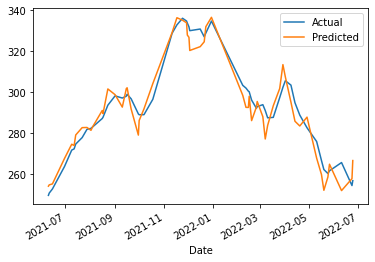

In [ ]:
#plot the data
dfp=dfpred.tail(60)
dfp[['Actual','Predicted']].plot()